1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

Numpy documentation https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

Mersenne Twister - PRNG (pseudorandom number generator) https://en.wikipedia.org/wiki/Mersenne_Twister


## Purpose of numpy.random

Random number generation is vital for many practical programming needs such as security, model-building, simulation creation and statistical research. Of course, being deterministic machines, computers cannot create truly random numbers and so simulate randomness to create what are called pseudorandom numbers. These numbers are generally drawn from probability distributions and require an initial input seed to which an algorithm is applied in order to generate numbers in a predetermined fashion.

Pseudorandom - random but reproducible data https://realpython.com/python-random/

When discussing the various functions below, I will use random as a descriptive term, even though everything generated from the package is pseudorandom.

https://stackoverflow.com/questions/4156907/why-is-random-not-so-random

https://www.eriksmistad.no/pseudo-random-numbers-and-sampling-from-probability-distributions/

### Why use numpy.random instead of built-in random.random?
While random.random by default produces single random numbers, it can produce multiple if used with the range function. However, numpy.random allows you to produce increasingly complex arrays of random numbers. https://realpython.com/python-random/#prngs-for-arrays-numpyrandom

According to Python for Data Analysis (p. 118) numpy.random supplements the random module with a few extra probability distributions and functions
https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python

In [3]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

<br>

## Simple Random Data
At its most basic, the numpy.random package is used to generate random data or arrays of data, generally numerical. There are several functions in the package that create simple random data and each one does so in different ways. Before I move on to the more complex probability distributions and seed functions of the package, I will first discuss the following modules in this section:

- rand
- randn
- randint
- choice
- bytes

Within many of these functions I will discuss similar related functions that are also available elsewhere in the package.

<br>

### RAND 

The **rand** function generates a floating point number or array of floating point numbers from the half open interval \[0, 1), meaning that it includes every number greater than or equal to 0 and less than 1. If no arguments are passed to the function, a single random number is returned but **rand** is capable of generating large arrays of randomly generated numbers when integer arguments are passed. There is no limit to the number of arguments that can be passed so these arrays can be hugely complex. 

In [23]:
# Passing no arguments to generate a single random number.
print("\033[1m" + "Generates a single random number:" + "\033[0m")
print(np.random.rand())
print()

# Passing (x, y) arguments will return x arrays with y values in each.
print("\033[1m" + "Generates 2 arrays with 4 random numbers in each:" + "\033[0m")
print(np.random.rand(2, 4))
print()

# Passing x * y * z will return x arrays containing y arrays that have z values.
print("\033[1m" + "Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:" + "\033[0m")
print(np.random.rand(2, 4, 6))


Generates a single random number:
0.19299810996414068

Generates 2 arrays with 4 random numbers in each:
[[0.81536631 0.41750136 0.25445848 0.95542453]
 [0.63908402 0.52495002 0.73610805 0.44812173]]

Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:
[[[0.91153206 0.97350959 0.19146846 0.73585767 0.8831473  0.601374  ]
  [0.9758129  0.62642587 0.85148697 0.766      0.0234388  0.57318104]
  [0.75243718 0.72798276 0.76593484 0.63082574 0.84680583 0.19959479]
  [0.21788117 0.93412126 0.01596074 0.41817577 0.4552478  0.22656011]]

 [[0.54099475 0.57816988 0.57444482 0.36273657 0.59076988 0.99735539]
  [0.84415924 0.68529149 0.354125   0.54418055 0.80260409 0.52097499]
  [0.01107509 0.00212923 0.32380387 0.84304453 0.87997122 0.41016814]
  [0.96989694 0.54633809 0.92928966 0.01834963 0.4720784  0.83221066]]]


<br>

#### Distribution

The numbers from **rand** are generated from a continuous uniform distribution, meaning that every number in the \[0, 1) range has an equal chance of being returned as any other. The plot below demonstrates this distribution across 10,000 randomly generated numbers from the **rand** function.

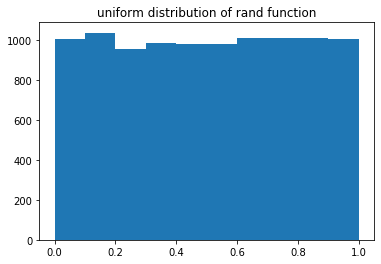

In [173]:
# Demonstrating the uniform distribution of the rand function.
x = np.random.rand(10000)
plt.hist(x)
plt.title("uniform distribution of rand function")
plt.show()

<br>

#### Similar Functions

##### random_sample

There are several functions in the numpy.random package that are all variations of the same function and related to **rand**:

1. np.random.random
2. np.random.ranf
3. np.random.sample
4. np.random.random_sample

These functions can all be considered synonymous with each other, basically aliases for **random_sample**. Below demonstrates how they all the perform the same function. [<sup>1</sup>](https://stackoverflow.com/a/18829377)

In [193]:
# Demonstrating how the below functions are all the same
print(np.random.random_sample == np.random.random)

print(np.random.random_sample == np.random.ranf)

print(np.random.random_sample == np.random.sample)

True
True
True


**random_sample** is essentially the same as the **rand** function except for one very important distinction: while **rand** takes multiple arguments to build the shape of an array, **random_sample** only accepts one argument. To build a multi-dimensional array with **random_sample**, a tuple must be passed for it to function correctly[<sup>2</sup>](https://stackoverflow.com/a/47232184). This can be useful when there are variables containing tuples from which one wants to create an array of random numbers.

In [194]:
# Demonstrating the difference between rand and random_sample.
print("\033[1m" + "2 x 4 array from rand:" + "\033[0m")
print(np.random.rand(2, 4))
print()

# Passing a tuple
print("\033[1m" + "2 x 4 array from random_sample:" + "\033[0m")
print(np.random.random_sample((2, 4)))
print()

# Passing a variable that contains a tuple
t = (2, 4)
print("\033[1m" + "2 x 4 array from random_sample using a variable containing a tuple:" + "\033[0m")
print(np.random.random_sample(t))


2 x 4 array from rand:
[[0.15169528 0.74874243 0.01188184 0.5846951 ]
 [0.74494963 0.74138203 0.51475338 0.73693009]]

2 x 4 array from random_sample:
[[0.17034861 0.1471431  0.79261988 0.732807  ]
 [0.54024002 0.25414173 0.27559168 0.4892544 ]]

2 x 4 array from random_sample using a variable containing a tuple:
[[0.70586594 0.55367624 0.81862308 0.28409672]
 [0.91599496 0.22557669 0.93691585 0.18307243]]



##### uniform

The \[0, 1) range cannot be adjusted within the **rand** function, but there is a related function within numpy.random called **uniform**, which works in largely the same way as **rand** but allows a custom range to be passed. Again this is a half open interval, generating numbers greater than or equal to the low number and less than the high number. Below is an example of the function in operation and further illustration demonstrating the uniform probability distribution.

Generates 2 arrays with 4 random numbers in each within the custom range [-5, 10):
[[ 4.08487224 -0.98231076 -2.99219483 -3.1645355 ]
 [ 7.56042058  2.3641651  -2.92559913  8.96953313]]

Generates 4 random numbers in the custom range [-5, 10):
[ 6.87959656 -1.7691572  -4.85997008  5.25103777]



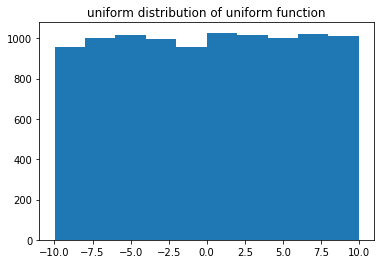

In [175]:
# Passing low and high arguments with size of (x, y) arguments will return x arrays with y values in each.
print("\033[1m" + "Generates 2 arrays with 4 random numbers in each within the custom range [-5, 10):" + "\033[0m")
print(np.random.uniform(low=-5, high=10, size =(2, 4)))
print()

# Demonstrating it is not necessary to have 'low=' or 'high=' to operate the function. 
# 'size=' is necessary if more than one array is required.
print("\033[1m" + "Generates 4 random numbers in the custom range [-5, 10):" + "\033[0m")
print(np.random.uniform(-5, 10, 4))
print()

# Demonstrating the uniform distribution of the uniform function.
x = np.random.uniform(-10, 10, 10000)
plt.hist(x)
plt.title("uniform distribution of uniform function")
plt.show()

<br>

### RANDN

**randn** functions in the same way as **rand** when generating numbers. Without any arguments, it will produce a single randomly generated number and with arguments will produce increasingly complex arrays of numbers. 

In [176]:
# Passing no arguments to generate a single random number:
print("\033[1m" + "Generates a single random number:" + "\033[0m")
print(np.random.randn())
print()

# Passing (x, y) arguments will return x arrays with y values in each
print("\033[1m" + "Generates 2 arrays with 4 random numbers in each:" + "\033[0m")
print(np.random.randn(2, 4))
print()

# Passing x * y * z will return x arrays containing y arrays that have z values
print("\033[1m" + "Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:" + "\033[0m")
print(np.random.randn(2, 4, 6))


Generates a single random number:
-0.014094516571642911

Generates 2 arrays with 4 random numbers in each:
[[ 0.99707979 -0.38753877 -0.74340141 -1.40964338]
 [-0.49535241 -0.31108415  0.42406454  0.50439788]]

Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:
[[[ 0.83861769 -0.17769721 -0.59808786  0.46548309  0.67134888
    0.03900609]
  [ 1.3242741  -1.7866774   0.0180085  -0.66948883 -0.14255995
    0.05362346]
  [ 0.85871311  1.04018214  0.18494344 -1.16848945  0.30536609
    0.71597689]
  [ 0.22739281  0.66359716  0.74849916 -0.88643693  0.22635204
    0.15865573]]

 [[-0.69277139 -0.42793466 -1.59515344  1.02615847 -0.17170357
    1.25595876]
  [ 1.17989548 -1.82388776  0.60336239 -0.40163332  0.87781721
   -0.68340917]
  [-1.78340549 -0.23535167  1.11381066 -1.4753817   1.5761373
   -0.16645939]
  [-1.0310581   1.20630985 -0.29786274  1.40220967 -1.64960455
    0.37731487]]]


<br>

#### Distribution

What separates the **randn** function from **rand** is that numbers are generated from a normal Gaussian distribution rather that a uniform distribution. In this function the normal distribution has a mean of 0 and a variance of 1. This means that the majority of numbers generated centre around 0 and generally range between -1 and 1. The plot below helps to illustrate this; of the 10,000 numbers generated, the vast majority are within the -1 to 1 range and peak at the 0 mark. Looking again at the numbers generated above, it can be seen that they largely sit within the range (-1, 1).

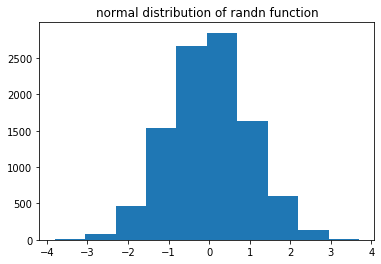

In [177]:
# Demonstrating the normal distribution of the randn function.
x = np.random.randn(10000)
plt.hist(x)
plt.title("normal distribution of randn function")
plt.show()

<br>

#### Similar Functions

##### standard_normal

Like **rand** and **random**, **randn** has the same relationship with another numpy.random function called **standard_normal**, which only takes a single argument but can accept tuples.  

In [178]:
# Demonstrating the difference between randn and standard_normal.
print("\033[1m" + "2 x 4 array from randn:" + "\033[0m")
print(np.random.randn(2, 4))
print()

# Passing a tuple
print("\033[1m" + "2 x 4 array from standard_normal:" + "\033[0m")
print(np.random.standard_normal((2, 4)))
print()

# Passing a variable that contains a tuple
t = (2, 4)
print("\033[1m" + "2 x 4 array from standard_normal using a variable containing a tuple:" + "\033[0m")
print(np.random.standard_normal(t))


2 x 4 array from randn:
[[ 0.67217045 -1.99864839  1.63100961  1.12210557]
 [ 0.37560272 -1.38613081  0.48476729 -0.20549702]]

2 x 4 array from standard_normal:
[[ 1.98348692  1.46842722  0.37557763 -0.62049493]
 [ 0.06917782  0.69287357  0.12019049  1.3679161 ]]

2 x 4 array from standard_normal using a variable containing a tuple:
[[ 0.40548064  1.38035327 -1.47532341 -0.68845048]
 [-0.55150913 -0.55280136 -0.28092925  0.74774295]]



##### normal

Again similar to **rand**'s range, the mean (0) and standard deviation (1) cannot be altered within the **randn** function but there is another function in the numpy.random package that returns random numbers from a customised normal distribution range. The **normal** function takes a *loc* argument to determine the mean, a *scale* argument for the standard deviation, and a *size* argument for the output shape. In each of the functions below, the output should largely be in the range (2, 8) and centre around 5.      

Generates 2 arrays with 4 random numbers from the custom normal distribution:
[[ 5.98536343  3.50688446  8.74368193  3.33731485]
 [ 5.07752949 -0.04194577  5.47410361 10.23962098]]

Generates 4 random numbers from the custom normal distribution:
[5.41961382 9.75178168 6.61996411 3.29311209]



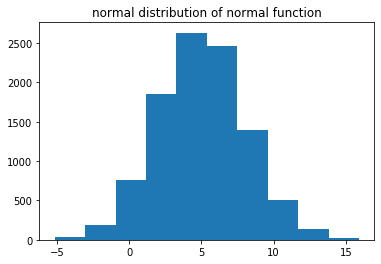

In [179]:
# Passing loc and scale arguments with size of (x, y) arguments will return x arrays with y values in each.
print("\033[1m" + "Generates 2 arrays with 4 random numbers from the custom normal distribution:" + "\033[0m")
print(np.random.normal(loc=5, scale=3, size =(2, 4)))
print()

# Demonstrating it is not necessary to have 'loc=' or 'scale=' to operate the function. 
# 'size=' is necessary if more than one array is required.
print("\033[1m" + "Generates 4 random numbers from the custom normal distribution:" + "\033[0m")
print(np.random.normal(5, 3, 4))
print()

# Demonstrating the normal distribution of the normal function.
x = np.random.normal(5, 3, 10000)
plt.hist(x)
plt.title("normal distribution of normal function")
plt.show()

<br>

### RANDINT

The functions explored so far all return random floating point numbers. If randomly generated integers are required, there is the **randint** function which returns random integers of a given range. The function  requires at least one argument to operate. If a single argument is provided, the function will return a number from the range 0 up to but not including the number passed, making it a half open interval. If a float rather than integer is passed, it will round down to the nearest integer. 

In [180]:
# Returns single random integer between 0-9 inclusive.
print(np.random.randint(10))

# Returns single random integer between 0-4 inclusive.
print(np.random.randint(5.925))

1
2


<br>

If two arguments are provided to **randint**, the first will be considered the lowest included number in the range and the second represents the number one above the highest possible number in the range. 

**randint** can also take an argument that dictates the shape of the output, either a single value for an array of that many numbers or a tuple for multi-dimensional arrays.

In [181]:
# Returns single random integer between 5-10 inclusive.
print("\033[1m" + "Generates 1 random number between 5-10 inclusive:" + "\033[0m")
print(np.random.randint(5, 11))
print()

print("\033[1m" + "Generates 3 random numbers between 5-10 inclusive:" + "\033[0m")
print(np.random.randint(5, 11, 3))
print()

print("\033[1m" + "Generates 2 arrays of 4 random numbers in each between 5-10 inclusive:" + "\033[0m")
print(np.random.randint(5, 11, size=(2, 4)))

Generates 1 random number between 5-10 inclusive:
9

Generates 3 random numbers between 5-10 inclusive:
[5 9 8]

Generates 2 arrays of 4 random numbers in each between 5-10 inclusive:
[[ 9 10  9  8]
 [ 8  6 10  7]]


<br>

There is a relatively new parameter in the **randint** function, which allows the output datatype to be specified. Different types of integer will be take up different amounts of storage space [<sup>3</sup>](https://stackoverflow.com/a/9696777) and so this parameter is useful if dealing with extremely large amounts of data. Each piece of code below generates the number 5 and the output demonstrates the number of bytes it takes to store each number 5, depending on the datatype argument. [<sup>4</sup>](https://stackoverflow.com/a/14329864) As would be expected, the *int64* type takes up more space than the *int8* type.

In [142]:
w = np.random.randint(5, 6, dtype='int8')
print(sys.getsizeof(w))

x = np.random.randint(5, 6, dtype='int16')
print(sys.getsizeof(x))

y = np.random.randint(5, 6, dtype='int32')
print(sys.getsizeof(y))

z = np.random.randint(5, 6, dtype='int64')
print(sys.getsizeof(z))

25
26
28
32


<br>

#### Distribution

**randint** generates random integers from a discrete uniform distribution, meaning that there is a finite amount of values that can be generated but each one has an equal change of being returned. Below, every integer on the range (0, 1000) inclusive has an equal chance of being called across 10,000 numbers.

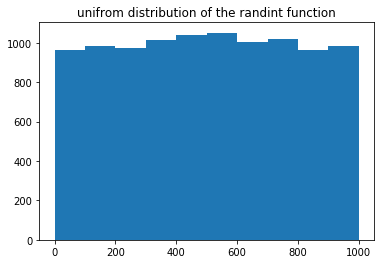

In [184]:
# Demonstrating the uniform distribution of the randint function.
x = np.random.randint(0, 1001, 10000)
plt.hist(x)
plt.title("unifrom distribution of the randint function")
plt.show()

<br>

#### Similar Functions

There's another function listed in the numpy.random package called **random_integer** but this has been deprecated according to the documentation with the recommendation that **randint** be used instead.

<br>

#### Practical Example

Below is an example **randint** being used to simulate the answers provided by Magic 8 Ball. Each answer is assigned to an integer and when an integer is randomly generated from the **randint** function, the appropriate reply is returned.<sup>5</sup> 

In [189]:
# Magic 8 Ball simulation
# help from Automate the boring stuff p. 64

def Answer(number):
    if number == 1: 
        return "Yes."
    elif number == 2:
        return "Most likely."
    elif number == 3:
        return "All signs point to yes."
    elif number == 4:
        return "Ask again later."
    elif number == 5:
        return "Possibly."
    elif number == 6:
        return "Outlook not so good."
    elif number == 7:
        return "Doubtful"
    elif number == 8:
        return "No."
    
print("Will I be late for work in the morning?")
print(Answer(np.random.randint(1, 9)))

Will I be late for work in the morning?
Doubtful


<br>

### CHOICE

**choice** is similar to **randint** in that it can generate random integers in a particular array shape. However, **choice** can accept ndarrays, tuples and lists as input, meaning that it has the potential to randomise non-numerical data, such as strings.

With only one argument passed, **choice** will return a single random integer from 0 up to but not including the number entered, just as **randint** does.

In [8]:
# Returns single random integer
print("\033[1m" + "Generates 1 random number between 0-9 inclusive:" + "\033[0m")
print(np.random.choice(10))
print()

# Returns random numbers from an array:
arr = np.arange(10)
print("\033[1m" + "Generates 3 random numbers from an array:" + "\033[0m")
print(np.random.choice(arr, size=3))
print()

# Returns random numbers from a tuple
tup = (4, 6, 7, 10, 15)
print("\033[1m" + "Generates 3 random numbers from a tuple:" + "\033[0m")
print(np.random.choice(tup, size=3))
print()

# Returns random non-numerical values from a list
lst = ["Mary", "John", "Helen", "Tony"]
print("\033[1m" + "Generates 3 random names from a list:" + "\033[0m")
print(np.random.choice(lst, size=3))

Generates 1 random number between 0-9 inclusive:
6

Generates 3 random numbers from an array:
[3 0 9]

Generates 3 random numbers from a tuple:
[ 7 15  6]

Generates 3 random names from a list:
['John' 'Tony' 'Helen']


<br>

The previously discussed functions can potentially repeat numbers from a range in the output array, and **choice** also does this by default. However, **choice** has a parameter called *replace*, a true/false boolean that is set to True by default but, if set to False by the user, will generate an output of unique values. In this case, once a value has been randomly generated, it is removed from the pool of available values and cannot be generated again. However, if the total number of values to choose from is smaller than the output shape specified (*size*) and *replace* is set to False, a *ValueError* will occur because there are not enough elements to fulfill the desired output without repeating any of them.

In [31]:
# Returns random values from a list with no duplicates:
print("\033[1m" + "Generates 3 random names from a list with no duplicates:" + "\033[0m")
print(np.random.choice(lst, size=3, replace=False))


Generates 3 random names from a list with no duplicates:
['Mary' 'John' 'Helen']


<br>

#### Distribution

By default, **choice** randomly picks values from a discrete uniform distribution but has an optional parameter, *p*, which allows the user to adjust the probability of each individual value appearing in the output. The number of values passed to *p* must be equal to the amount of elements available in the input and these *p* values must sum up to 1, to account for a total 100% probability. 

To illustrate this, the code below generates 1000 numbers from the range (0, 11]. As required, there is a *p* value for every element in this range. Most of the numbers have been given 0% probability of being returned but numbers 1, 5 and 10 have a 60%, 10%, and 30% chance of appearing in the output respectively. The plot shows that, of the 1000 numbers generated, 600 were ones, 100 were fives and 300 were tens.

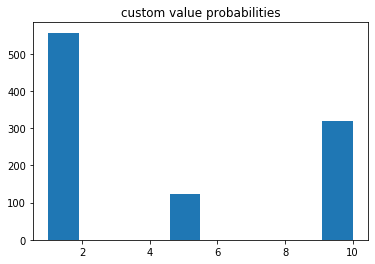

In [20]:
# Customising the probability of each input element and plotting the output.
x = np.random.choice((np.arange(11)), p = (0, 0.6, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.3), size = 1000)
plt.hist(x)
plt.title("custom value probabilities")
plt.show()

<br>

#### Practical Example

Below is an example of **choice** being used to simulate the drawing of hands from a deck of cards. A list containing the 52 cards of a deck is created[<sup>6</sup>](http://www.spronck.net/pythonbook/pythonbook.pdf) and **choice** allows the user to draw 4 hands of five cards each with no duplications. 

In [55]:
# Creating a deck of cards.
cards = []
values = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
suits = ["Hearts", "Diamonds", "Spades", "Clubs"]

for value in values:
    for suit in suits:
        cards.append(f"{value} of {suit}")

    
# Deals 4 hands with 5 cards in each and no duplicates.
hands = np.random.choice(cards, size=(4,5), replace=False)  
hands

array([['Jack of Diamonds', '10 of Diamonds', 'Queen of Diamonds',
        'King of Spades', 'Ace of Spades'],
       ['King of Diamonds', '4 of Diamonds', '5 of Diamonds',
        '3 of Diamonds', '5 of Spades'],
       ['7 of Spades', '7 of Hearts', '10 of Hearts', '9 of Hearts',
        '10 of Spades'],
       ['Jack of Spades', '8 of Spades', '4 of Hearts', '3 of Clubs',
        '2 of Spades']], dtype='<U17')

<br>

### bytes

The final function from the *Simple Random Data* section of the numpy.random package that I will discuss simply takes a single integer argument and generates a random sample of bytes of that length. **bytes** is an excellent function for efficiently generating a huge amounts of random data,[<sup>7</sup>](stefanocappellini.it/generate-pseudorandom-bytes-with-python/) which is useful for testing code. The below code generates 30 random bytes. 

In [5]:
# Random byte generation
np.random.bytes(30)

b'\xa2(,\x07\xc6[\xc2\xeepOe\xe6T\x1b\xfb=\xf80\xa9\xa0^\x1c\xd4\xbf\xd1q\x9f\x0fUl'

<br>

## Permutations

There are two separate but related functions in the numpy.random package that do not create data but rearrange the order of existing data.

<br>

### shuffle

As the name suggests, **shuffle** shuffles the contents of a given list or array (does not accept tuples) in place. This means that, unlike previous functions that return the output when called, **shuffle** affects the itself and  

The functions takes one argument only, the list or array to be shuffled.

In [56]:
# Shuffling a 1D array of numbers
x = np.array([1, 2, 3, 4, 5, 6])
print("\033[1m" + "Original array:" + "\033[0m")
print(x)
print()
np.random.shuffle(x)
print("\033[1m" + "Shuffled array:" + "\033[0m")
print(x)
print()

# Shuffling a list using the deck of cards created earlier
print("\033[1m" + "Original deck order" + "\033[0m")
print(cards[:15])
print()
np.random.shuffle(cards)
print("\033[1m" + "Shuffled deck order" + "\033[0m")
print(cards[:15])

Original array:
[1 2 3 4 5 6]

Shuffled array:
[4 2 5 1 6 3]

Original deck order
['2 of Hearts', '2 of Diamonds', '2 of Spades', '2 of Clubs', '3 of Hearts', '3 of Diamonds', '3 of Spades', '3 of Clubs', '4 of Hearts', '4 of Diamonds', '4 of Spades', '4 of Clubs', '5 of Hearts', '5 of Diamonds', '5 of Spades']

Shuffled deck order
['10 of Spades', '3 of Diamonds', '3 of Clubs', '2 of Clubs', '7 of Spades', '8 of Spades', 'King of Clubs', '9 of Diamonds', 'Jack of Spades', '8 of Diamonds', 'Queen of Spades', '3 of Hearts', 'King of Hearts', '4 of Spades', 'Jack of Clubs']


In [60]:
print(np.random.shuffle([1, 2, 3]))

None


<br>

If a multidimensional array is passed, the order of the arrays along the first axis only will be shuffled but the order of the individual elements within each single array is not affected: 

In [58]:
# shuffling a numpy array
x = np.array([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
np.random.shuffle(x)
x


array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

To shuffle a multi-dimensional array, you must first change it to a 1D array, perform shuffle and then return the array to its original shape.[<sup>8</sup>](https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/) 

In [49]:
# Create 3D array
x = np.array([[[1, 2, 3],[4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print("\033[1m" + "3D array:" + "\033[0m")
print(x)
print()

# Transform into 1D array 
x = x.ravel()
print("\033[1m" + "3D array changed to 1D array:" + "\033[0m")
print(x)
print()

# Shuffle the array
np.random.shuffle(x)
print("\033[1m" + "Shuffled 1D array:" + "\033[0m")
print(x)
print()

# Transform back to 3D array
x = x.reshape(2, 2, 3)
print("\033[1m" + "Shuffled 1D array changed back to 3D array:" + "\033[0m")
print(x)

3D array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

3D array changed to 1D array:
[ 1  2  3  4  5  6  7  8  9 10 11 12]

Shuffled 1D array:
[ 6 12  2  4  9  5 10 11  3  8  7  1]

Shuffled 1D array changed back to 3D array:
[[[ 6 12  2]
  [ 4  9  5]]

 [[10 11  3]
  [ 8  7  1]]]


Looking back to our deck of cards from the previous section, we could use shuffle to shuffle the deck:

['10 of Clubs', '8 of Clubs', 'Queen of Spades', 'Ace of Hearts', '6 of Spades', '2 of Clubs', '2 of Diamonds', 'King of Diamonds']

['Jack of Spades', '10 of Diamonds', '6 of Diamonds', '10 of Spades', '9 of Hearts', '10 of Hearts', 'Queen of Clubs', '5 of Hearts']
['Jack of Spades', '10 of Diamonds', '6 of Diamonds', '10 of Spades', '9 of Hearts', '10 of Hearts', 'Queen of Clubs', '5 of Hearts']


### permutation

Differences between shuffle and permutation: https://stackoverflow.com/a/15474335
Like the shuffle function, permutation will rearrange the contents of an array but, rather than affecting the array itself, will return a copy of the array with the contents shuffled. The order of the original array is not affected

In [46]:
# accepts a tuple but returns an array
y = (1, 2, 3, 4, 5, 6)
x = np.random.permutation(y)
print(f"x is a {type(x)}")
print(x)
print(f"y is a {type(y)}")
print(y)

x is a <class 'numpy.ndarray'>
[3 6 1 5 2 4]
y is a <class 'tuple'>
(1, 2, 3, 4, 5, 6)


A single integer argument can be passed to permutations that will return a shuffled version of a range from 0 up to but not including the integer passed. Shuffle does not have the same functionality and will return a TypeError if a single integer is passed.

In [ ]:
np.random.permutation(53)

In [ ]:
np.random.shuffle(5)

In [ ]:
x = np.array([[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [2, 4, 6, 8, 0]])
np.random.permutation(x)

<br>

## Probability Distributions

Examine at least 5 distributions


https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

Discrete data can only take a specific, finite number of values and is usually represented as whole numbers e.g. flipping a coin or rolling dice

Continuous data can take an infinite number of values from a given range, e.g. height, weight or distance.

https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03

https://www.johndcook.com/blog/2009/01/23/probability-distributions-and-object-oriented-programming/

### Poisson

Continuous (similar to binomial)




In [ ]:
x = np.random.poisson(10, size = 10000)
plt.hist(x)

### Binomial

https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

Discrete (similar to Poisson)


In [ ]:
x = np.random.binomial(10, 0.5, size = 10000)
plt.hist(x)

### Pareto 

aka Lomax distribution

https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

Similar to exponential:
https://www.allaboutlean.com/measure-cycle-time-part-1/exponential-and-pareto/

In [ ]:
x = np.random.pareto(10, size = 10000)
plt.hist(x)

## Gamma Distributions

Continuous

https://www.datacamp.com/community/tutorials/probability-distributions-python - rarely used in its raw form. exponential, chi-squared and erlang distributions are special cases of gamma distribution

In [ ]:
x = np.random.gamma(2, 2, 1000)
plt.hist(x)

### Exponential

Continuous

https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

Similar to pareto:
https://www.allaboutlean.com/measure-cycle-time-part-1/exponential-and-pareto/

In [ ]:
x = np.random.exponential(10, size = 10000)
plt.hist(x)

### Chi Square

https://www.youtube.com/watch?v=hcDb12fsbBU 

Continuous

Related to standard normal 

## Bernoulli Distributions 

Types of Bernoulli distributions https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03

Bernoulli distribution is a discrete distribution with two outcomes, i.e. yes/no, heads/tails, on/off

Binary

### Binomial  

Arguments:

n = number of trials or events, e.g. number of times the coin is flipped

p = probability of 

In [ ]:
x = np.random.binomial(10, 0.5, 10000)
plt.hist(x)

### Negative Binomial 

In [ ]:
x = np.random.negative_binomial(10, 0.5, 10000)
plt.hist(x)

### Geometric

In [ ]:
x = np.random.geometric(0.2, size = 10000)
plt.hist(x)

## Random Seeds

Difference between using random.seed with and without initialising RandomState https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate/22994529
https://stackoverflow.com/a/5837352

Looks like with RandomState you can create an instance of a new seed without affecting anything else while random.seed  has a global effect

https://www.sharpsightlabs.com/blog/numpy-random-seed/

http://justinbois.github.io/bootcamp/2016/lessons/l26_random_number_generation.html

https://www.statisticshowto.datasciencecentral.com/random-seed-definition/


In [ ]:
# To initialise a seed instance
x = np.random.RandomState(10)
# To change the seed globally
np.random.seed(5)

print(x.rand(3))

print (np.random.rand(3))

print(x.rand(3))

print (np.random.rand(3))

## References

1. Rand versus random_sample: https://stackoverflow.com/a/18829377
2. Difference between np.random.rand and np.random.random: https://stackoverflow.com/a/47232184
3. Different integer types: https://stackoverflow.com/a/9696777
4. Checking the size of different datatypes: https://stackoverflow.com/a/14329864
5. Magic 8 Ball code adapted from: Sweigart, A. (2015). *Automate the Boring Stuff with Python*. San Fracisco: No Starch Press (p. 64).
6. Deck of cards adapted from: Spronck, P. (2017). *The Coder's Apprentice: LEarning Programming with Python 3*. http://www.spronck.net/pythonbook/pythonbook.pdf (p. 341).
7. Efficiency of the bytes function: Cappellini, S. (2018). *How to (efficiently) generate a huge number of pseudorandom bytes using Python*. stefanocappellini.it/generate-pseudorandom-bytes-with-python/
8. Shuffling elements of multidimensional arrays adapted from: https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/
